In [1]:
import numpy as np
from numpy import sqrt, log, log10, abs, pi
from scipy.stats import norm
import matplotlib.pyplot as plt
import pickle
from util import trapz
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker
import spectra
import matplotlib.image as mpimg

In [2]:
NT = 2**13
NK = 2**11
NX = 10000
L_MAX = 2500
xmin = 0.01
xmax = 3000
a0 = 1.e-6
a0_pca = 5.e-6
a_rec = 1/1100
A = np.linspace(a0, a_rec, 2*NT)
K = np.linspace(.1, 3000, NK)



#physical params
# physical parameters
h = 0.5
OmegaM0 = 1.0
OmegaB0 = 0.05
OmegaR0 = 4.2e-5/h**2
OmegaN0 = OmegaR0*(1-1/1.68)
OmegaG0 = OmegaR0 - OmegaN0
OmegaC0 = OmegaM0 - OmegaB0
wC = np.zeros(2*NT)
wN = np.ones(2*NT)*1/3
cs2C = np.zeros((2*NT, NK))
cs2N = np.ones((2*NT, NK))*1/3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


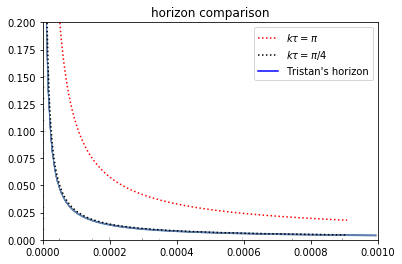

In [3]:
# background
OmegaB = OmegaB0 * A[::2]**-3
OmegaC = OmegaC0 * A[::2]**-3
OmegaN = OmegaN0 * A[::2]**-4
OmegaG = OmegaG0 * A[::2]**-4
OmegaD = OmegaN + OmegaC
a_eq = (OmegaR0/OmegaM0)
H =  A[::2] * np.sqrt(OmegaB + OmegaC + OmegaG+ OmegaN) 
TAU = trapz(A[::2], 1/(A[::2] * H))

k_horizon = (np.pi/4)/TAU
ktau_horizon = .01025 # (one half wavelength inside horizon)
K_Mpc = K/4400
TAU_Gyr = 14*TAU

img=mpimg.imread('img/k_horizon.jpg')
imgplot = plt.imshow(img,extent=[0,.001,0,.2],aspect='auto')
plt.plot(A[::2],(np.pi)/TAU/(4400),color='red',linestyle=':')
plt.plot(A[::2],(np.pi/4)/TAU/(4400),color='black',linestyle=':')
plt.plot([0],[0],color='blue')
plt.legend([r'$k \tau = \pi$',r'$k \tau = \pi/4$', "Tristan's horizon"])
plt.title('horizon comparison')
plt.ylim(0,0.2)
plt.show()

0.27017886419495674


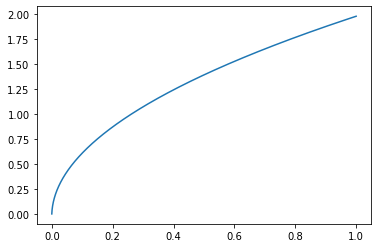

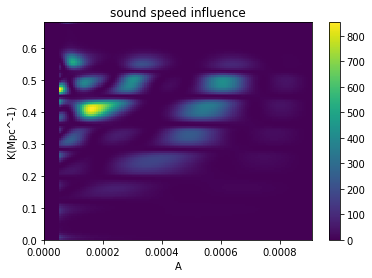

In [4]:
def square_basis(theta, NC):
    NT = 2**13
    NK = 2**11
    height = NT//NC
    width = NK//NC
    out = np.zeros((NK, NT))
    for i in range(NC**2):
        r,c = i//NC, i%NC
        out[r*width:(r+1)*width, c*height:(c+1)*height] = theta[i]
    out[:,A[::2] < a0_pca]=0
    return out.T

A2= np.linspace(a0, 1, 2*NT)
# background
OmegaB2 = OmegaB0 * A2[::2]**-3
OmegaC2 = OmegaC0 * A2[::2]**-3
OmegaN2 = OmegaN0 * A2[::2]**-4
OmegaG2 = OmegaG0 * A2[::2]**-4
OmegaD2 = OmegaN + OmegaC
H2 =  A2[::2] * np.sqrt(OmegaB2 + OmegaC2 + OmegaG2+ OmegaN2) 
TAU2 = trapz(A2[::2], 1/(A2[::2] * H2))
print(2300/((TAU2[-1]-TAU[-1])*4400))
plt.plot(A2[::2],TAU2)
plt.show()
F = pickle.load(open("output/cs2-only/F_q-7_t-7.p", "rb"))
Fp = square_basis(np.diag(F),128)
plt.imshow(Fp.T,extent=[0,a_rec,0,K_Mpc[-1]],
            aspect='auto', origin='lower')
plt.title('sound speed influence')
plt.xlabel('A')
plt.ylabel('K(Mpc^-1)')
plt.colorbar()

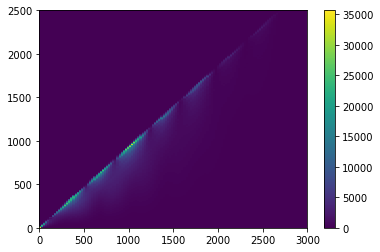

In [53]:
J = pickle.load(open("output/cs2-only/J_q-7_t-7.p", "rb"))
Jk = np.zeros((2499,128))
for r in range(NC):
    Jk[:, r]= np.sum(abs(J[:,128*r:128*(r+1)]),axis=1)
plt.imshow(Jk,aspect='auto', origin='lower', extent=[0,K[-1],0,L_MAX])
plt.colorbar()
plt.show()